# Analyzing Fandango's rating system 2.0

In this project, I will determine whether there has been any change in Fandango's rating system since the analysis performed by Hickey in October 2015 by visualizing the distribution of ratings of all movies within the Fandango dataset from 2016 as compared to 2015.

## Read in Data and Explore

In [1]:
import pandas as pd
import numpy as np

In [3]:
before = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")

In [4]:
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [6]:
columns = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
before = before[columns]
before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [7]:
cols = ['movie', 'year', 'fandango']
after = after[cols]
after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Hickey's dataset includes movies with at least 30 reviews, regardless of release date. The dataset of movies  is a sample of popular movies released in 2016 and 2017, pulled March 22, 2017. Due to the nature of ratings as an average of multiple reviews, the movies that were released in 2017 may not have as many reviews yet and older movies.

Due to the nature of the datasets at hand, it is not possible to compare the ratings between every single movie within the Fandango dataset curated by Walt Hickey. The analysis is limited to the nonrandom sample of movies within the more recent 2016-2017 movies dataset, and there may not be as many movies to compare between the two datasets. We will alter  our goal to compare whether the average rating of the popular movies of 2015 is different than the average rating of the popular movies of 2016. This was still offer insight on any changes in the Fandango's rating system with the assumption that the popular movies of 2015 are similar in production quality and viewership of movies is consistent in 2015 and 2016.

## Isolating the Samples we Need

Since our second dataset doesn't show how many reviews went into each rating, we don't know whether these movies are representative of popular movies by Hickey'sdefinition of 30 fan ratings on Fandango's website. As a proxy, we can take a random sample of movies from the second dataset and cross-correlate the number of reviews at the time Hickey's Fandango datset was pulled.

In [8]:
sample = after.sample(10, random_state = 1)
sample

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [14]:
before['Year'] = before['FILM'].str[-5:-1]
before['Year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: Year, dtype: object

In [15]:
before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [24]:
movies_2015 = before[before['Year'] == '2015'].copy()
movies_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [22]:
movies_2016 = after[after['year'] == 2016]
movies_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing distributions of movies ratings

In [29]:
import matplotlib.pyplot as plt
from numpy import arange
% matplotlib inline

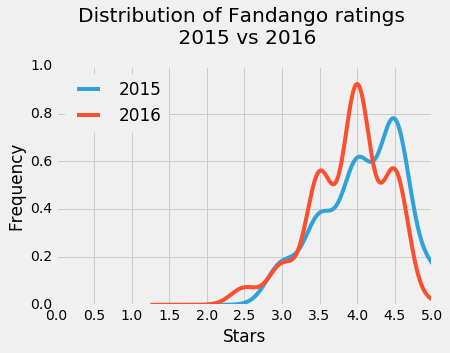

In [30]:
plt.style.use('fivethirtyeight')

movies_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
movies_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.xlim(0,5)
plt.title('Distribution of Fandango ratings \n 2015 vs 2016', y=1.07)
plt.xticks(arange(0,5.1,0.5))
plt.show()

Both distributions of movies released in 2015 and 2016 are skewed left. The majority of reviews have 4 stars or higher. It looks like the ratings of popular movies in 2016 has more of a normal distribution with the mean closer to 4 whereas the ratings of popular movies in 2015 have more movies with a 4.5 rating than 4. Based on this quick illustration of the distribution of ratings for about 200 popular movies in 2015 versus 2016, it seems like there is evidence that Fandango's ratings have changed and are less inflated. The movies in 2016 are in general rated lower than compared to ratings of movies in 2015.

## Comparing Relative Frequencies

In [33]:
movies_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [34]:
movies_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

By looking at more granular frequency tables, we observe that 7% of movies in 2015 were given a rating of 5 stars, while only 1% of movies in 2016 were given such a rating. In 2016, the lowest rating was 2.5 stars whereas in 2015 the lowest rating was 3 stars.

In [39]:
mean_2015 = movies_2015['Fandango_Stars'].mean()
median_2015 = movies_2015['Fandango_Stars'].median()
mode_2015 = movies_2015['Fandango_Stars'].mode()[0]

mean_2016 = movies_2016['fandango'].mean()
median_2016 = movies_2016['fandango'].median()
mode_2016 = movies_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


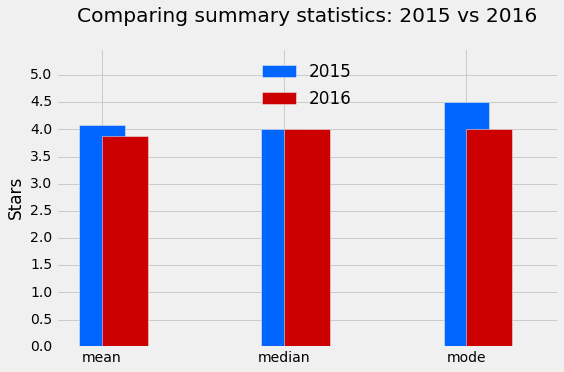

In [54]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

From my analysis, I  concluded that there is a difference in Fandango's ratings for popular movies in 2015 compared to Fandango's ratings for popular movies in 2016. This is most obvious by looking at the kernel density plot showing the distribution of movie ratings. However, we can also observe that the mean rating in 2015 for movies was 4.1, while the mean rating in 2016 for movies was 3.9.